In [16]:
import pandas as pd
df = pd.read_csv('../datasets/delitos_2023.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157461 entries, 0 to 157460
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id-sum    157461 non-null  int64 
 1   anio      157461 non-null  int64 
 2   mes       157461 non-null  object
 3   dia       157461 non-null  object
 4   fecha     157461 non-null  object
 5   franja    157461 non-null  int64 
 6   tipo      157461 non-null  object
 7   subtipo   157461 non-null  object
 8   uso_arma  157461 non-null  object
 9   uso_moto  157461 non-null  object
 10  barrio    156779 non-null  object
 11  comuna    156795 non-null  object
 12  latitud   154642 non-null  object
 13  longitud  154642 non-null  object
 14  cantidad  157461 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 18.0+ MB


In [17]:
df.head(5)

,id-sum,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,1,2023,ENERO,LUNES,2/01/2023,19,Vialidad,Muertes por siniestros viales,NO,NO,BELGRANO,13,-58.445.747,-34.559.570,1
1,2,2023,ENERO,MIERCOLES,11/01/2023,11,Vialidad,Muertes por siniestros viales,NO,NO,VILLA LUGANO,8,-58.476.557,-34.673.096,1
2,3,2023,ENERO,VIERNES,13/01/2023,4,Vialidad,Muertes por siniestros viales,NO,NO,SAAVEDRA,12,-58.485.670,-34.544.011,1
3,4,2023,ENERO,VIERNES,13/01/2023,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58.451.874,-34.636.364,1
4,5,2023,ENERO,VIERNES,13/01/2023,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58.451.874,-34.636.364,1


In [18]:
df['cantidad'].unique()

array([1])

In [21]:
df['tipo'].unique()

array(['Vialidad', 'Lesiones', 'Amenazas', 'Hurto', 'Robo', 'Homicidios'],
      dtype=object)

In [22]:
df['subtipo'].unique()

array(['Muertes por siniestros viales', 'Lesiones por siniestros viales',
       'Lesiones Dolosas', 'Amenazas', 'Hurto total', 'Robo total',
       'Hurto automotor', 'Robo automotor', 'Homicidio Doloso'],
      dtype=object)

In [23]:
df['barrio'].unique()
# "SD", "0", "Sin geo", "NO ESPECIFICADA", nan

array(['BELGRANO', 'VILLA LUGANO', 'SAAVEDRA', 'PARQUE CHACABUCO', 'SD',
       'BALVANERA', 'RECOLETA', 'MONTE CASTRO', 'VILLA URQUIZA',
       'VILLA SOLDATI', 'NUEVA POMPEYA', 'BARRACAS', 'CHACARITA',
       'LINIERS', 'FLORES', 'PALERMO', 'FLORESTA', 'CONSTITUCION',
       'VILLA DEL PARQUE', 'BOEDO', 'MATADEROS', 'CABALLITO',
       'VELEZ SARSFIELD', 'VILLA PUEYRREDON', 'VILLA LURO',
       'PARQUE PATRICIOS', 'LA BOCA', 'VILLA DEVOTO', 'SAN TELMO',
       'VILLA CRESPO', 'VILLA RIACHUELO', nan, 'COLEGIALES', 'NUÑEZ',
       'CONTITUCIÓN', 'VILLA GRAL. MITRE', 'VILLA ORTUZAR', 'PATERNAL',
       'RETIRO', 'ALMAGRO', 'PARQUE AVELLANEDA', 'PUERTO MADERO',
       'SAN NICOLAS', 'SAN CRISTOBAL', 'MONSERRAT', 'BOCA', 'PARQUE CHAS',
       'VILLA REAL', 'VERSALLES', 'VILLA SANTA RITA', 'COGHLAN',
       'AGRONOMIA', 'RODRIGO BUENO', 'AV BOEDO', 'NO ESPECIFICADA',
       'GREGORIO DE LAFERRERE', 'FLORIDA', 'BERNAL', 'DOCK SUD', '0',
       'SANTA MARÍA', 'BANFIELD OESTE', 'VILLA LUZURIA

In [24]:
df['franja'].unique()

array([19, 11,  4,  6,  0,  9, 22, 18, 14, 16,  5, 13,  3,  2, 15,  7, 12,
       23, 17,  8, 10,  1, 21, 20])

In [25]:
df['comuna'].unique()

array(['13', '8', '12', '7', nan, '3', '2', '10', '4', '15', '9', '14',
       '1', '11', '5', '6', 'CC-08', 'CC-09', 'CC-01 NORTE', 'CC-04',
       'CC-07', 'CC-15', 'CC-02', 'CC-12', 'CC-10', 'CC-06', 'CC-13',
       'CC-05', 'CC-01 SUR', 'CC-03', 'CC-14', 'Sin geo', 'CC-11'],
      dtype=object)

In [28]:
df['uso_arma'].unique()

array(['NO', 'SI'], dtype=object)

### Uso de armas
Ningún hurto tiene uso de arma, lo cual es sensato teniendo en cuenta que el hurto se realiza sin violencia dado que el propietario del bien robado no estaba presente durante el acto delictivo.

En conclusión, el 85% de los robos son realizados sin el uso de armas.

In [35]:
_df = df[(df['uso_arma'] != 'NO') & (df['tipo'] == 'Hurto')]
_df.size

0

In [39]:
_df = df[(df['uso_arma'] == 'SI') & (df['tipo'] == 'Robo')]
robos_con_arma = _df.size
_df = df[(df['uso_arma'] == 'NO') & (df['tipo'] == 'Robo')]
robos_sin_arma = _df.size
print('Robos con arma:', robos_con_arma)
print('Robos sin arma:', robos_sin_arma)

Robos con arma: 138795
Robos sin arma: 835950


In [45]:
total = (robos_con_arma+robos_sin_arma)
porcentaje = robos_con_arma*100/total
str(round(porcentaje,2))+ '%'

'14.24%'

In [46]:
total = (robos_con_arma+robos_sin_arma)
porcentaje = robos_sin_arma*100/total
str(round(porcentaje,2))+ '%'

'85.76%'

### Robos por franja horaria
Los robos se mantienen en su mayoría estables, no hay una variación significativa entre las 6h y las 21h.
Sin embargo donde se nota un descenso pronunciado es entre las 22h y las 5h.

Resta entender si los robos ocurridos en las franjas de menor frecuencia se detectan poco por falta de datos, o por mucho menor densidad de peatones en la vía pública.

In [51]:
crimenes_por_hora = df['franja'].value_counts()
crimenes_por_hora

franja
18    8896
19    8767
20    8594
17    8404
8     8291
12    8112
7     7823
21    7768
16    7741
15    7472
14    7311
10    7237
9     7122
22    7091
13    6989
11    6677
23    6199
0     6049
6     5258
5     3531
1     3497
4     2967
3     2849
2     2816
Name: count, dtype: int64

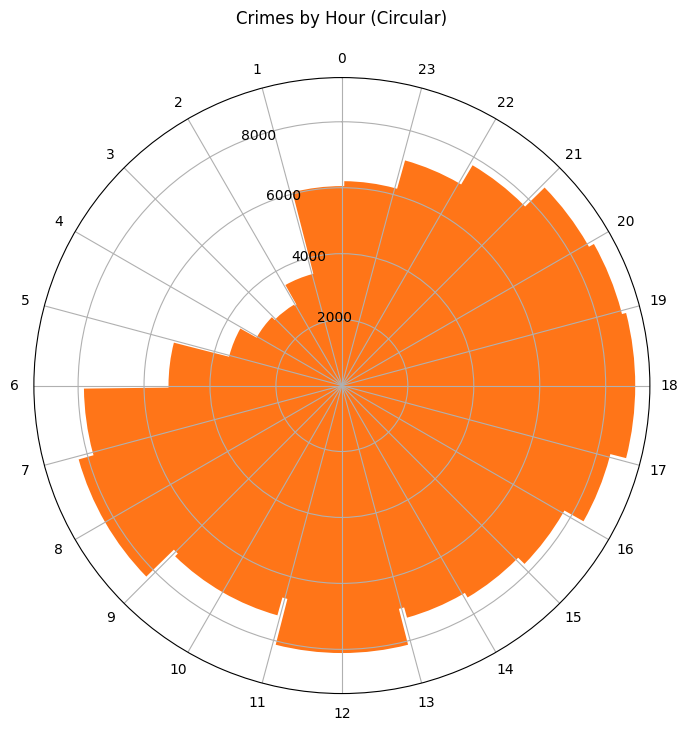

In [58]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
theta = [2 * np.pi * (hour / 24) for hour in crimenes_por_hora.index]

ax.bar(theta, crimenes_por_hora.values, width=0.5, color='#FF7518')
ax.set_theta_zero_location('N')  # 12 AM at the top
ax.set_xticks(theta)
ax.set_xticklabels(crimenes_por_hora.index)
ax.set_title('Crimes by Hour (Circular)', pad=20)
plt.show()

TODO: Revisar la cantidad de robos/hurtos de celulares en Once XD